# Activation Functions

In [ ]:
# # run this cell
# !git clone https://github.com/mikedataCrunch/GMS5204.git
# !mv ./GMS5204/* .
# !rm ./GMS5204

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import Layout
import ipywidgets as widgets
from IPython.display import display

# define each activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha * x, x)

def linear(x):
    return x

## Interactive Plots

In [24]:
# Dictionary of activation functions
activation_functions = {
    'Sigmoid': sigmoid,
    'Tanh': tanh,
    'ReLU': relu,
    'Leaky ReLU': leaky_relu,
    # 'Linear': linear
}
colors = ['blue', 'red', 'green', 'orange']

# Function to plot activation functions in separate subplots
def plot_activation_functions(x_val):
    x_range = np.linspace(-10, 10, 100)
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # Adjust subplot layout
    axes = axes.flatten()  # Flatten to simplify indexing
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    
    for i, (name, func) in enumerate(activation_functions.items()):
        y_vals = func(x_range)
        current_y = func(x_val)
        
        # Plotting the function
        ax = axes[i]
        ax.plot(x_range, y_vals, label=f"{name} Activation", color=colors[i])
        ax.scatter([x_val], [current_y], color='black', s=50)  # Mark the current input value on the curve
        
        # Adding annotation in the top-left corner of each subplot
        annotation_text = f'x = {x_val:.2f}, y = {current_y:.2f}'
        ax.axvline(x_val, 0, 1, lw=0.3, c='gray')
        ax.axhline(current_y, 0, 1, lw=0.3, c='gray')
        ax.text(0.9* ax.get_xlim()[0],  0.9 * ax.get_ylim()[1], annotation_text, fontsize=15, color='black')
        
        ax.set_title(f"{name} Activation")
        ax.set_xlabel("Input Value (x)")
        ax.set_ylabel("Output Value (y)")
        ax.grid(False)
    
    # Hide unused subplots if any
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.show()

# Widget for input slider
slider_style = {'description_width': 'initial', 'handle_color': 'lightblue'}  # Adjust handle color and description width
layout = Layout(width='600px')

input_slider = widgets.FloatSlider(
    value=0,
    min=-10,
    max=10,
    step=0.1,
    description='Input value, x: ',
    continuous_update=True,
    style=slider_style,
    layout=layout,
)

# Interactive plot display
interactive_plot = widgets.interactive(plot_activation_functions, x_val=input_slider)
display(interactive_plot)


interactive(children=(FloatSlider(value=0.0, description='Input value, x: ', layout=Layout(width='600px'), max…

## Static Plots

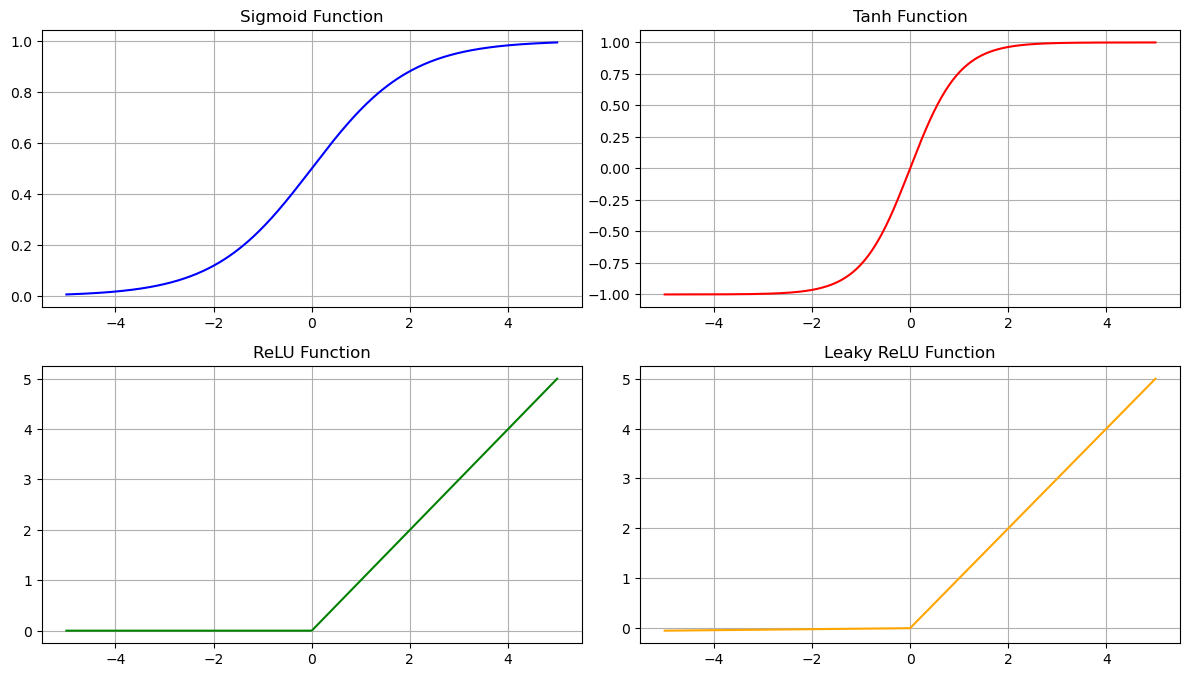

In [4]:
# Generate a range of values from -10 to 10
x = np.linspace(-5, 5, 400)

# Compute the function values
y_sigmoid = sigmoid(x)
y_tanh = tanh(x)
y_relu = relu(x)
y_leaky_relu = leaky_relu(x)
y_linear = linear(x)

# Create plots for each function
plt.figure(figsize=(12, 10))

# Sigmoid
plt.subplot(3, 2, 1)
plt.plot(x, y_sigmoid, label='Sigmoid', color='blue')
plt.title('Sigmoid Function')
plt.grid(True)

# Tanh
plt.subplot(3, 2, 2)
plt.plot(x, y_tanh, label='Tanh', color='red')
plt.title('Tanh Function')
plt.grid(True)

# ReLU
plt.subplot(3, 2, 3)
plt.plot(x, y_relu, label='ReLU', color='green')
plt.title('ReLU Function')
plt.grid(True)

# Leaky ReLU
plt.subplot(3, 2, 4)
plt.plot(x, y_leaky_relu, label='Leaky ReLU', color='orange')
plt.title('Leaky ReLU Function')
plt.grid(True)

# # Linear
# plt.subplot(3, 2, 5)
# plt.plot(x, y_linear, label='Linear', color='purple')
# plt.title('Linear Function')
# plt.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.savefig("../media/activations.jpeg", bbox_inches="tight")
plt.show()


## Activation calculator

In [26]:
# Widgets
function_selector = widgets.Dropdown(
    options=list(activation_functions.keys()),
    value='Sigmoid',
    description='Function:',
    style={'description_width': 'initial'}
)

input_text = widgets.FloatText(
    value=0,
    description='Input value:',
    style={'description_width': 'initial'}
)

output_text = widgets.Output()

# Display widgets
display(function_selector, input_text, output_text)

# Function to update output based on current settings
def update_output(*args):
    func_name = function_selector.value
    x_val = input_text.value  # Get the input from the FloatText widget
    func = activation_functions[func_name]
    if func_name == 'Leaky ReLU':
        result = func(x_val, 0.01)  # Example leakiness coefficient
    else:
        result = func(x_val)
    
    output_text.clear_output()
    with output_text:
        print(f"Output of {func_name}({x_val:.2f}) = {result:.4f}")

# Observe changes in the input text and function selector
input_text.observe(update_output, 'value')
function_selector.observe(update_output, 'value')

# Initial update
update_output()


Dropdown(description='Function:', options=('Sigmoid', 'Tanh', 'ReLU', 'Leaky ReLU'), style=DescriptionStyle(de…

FloatText(value=0.0, description='Input value:', style=DescriptionStyle(description_width='initial'))

Output()

# END